<a href="https://colab.research.google.com/github/BoogeunSong/song/blob/main/%EC%87%BC%ED%95%91%EB%A7%88%EC%BC%80%ED%8C%85_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%B0%90%EC%B5%9C%EC%A2%85%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,144 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Ashopping_최종.xlsx')

In [ ]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용_횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


#데이터시각화

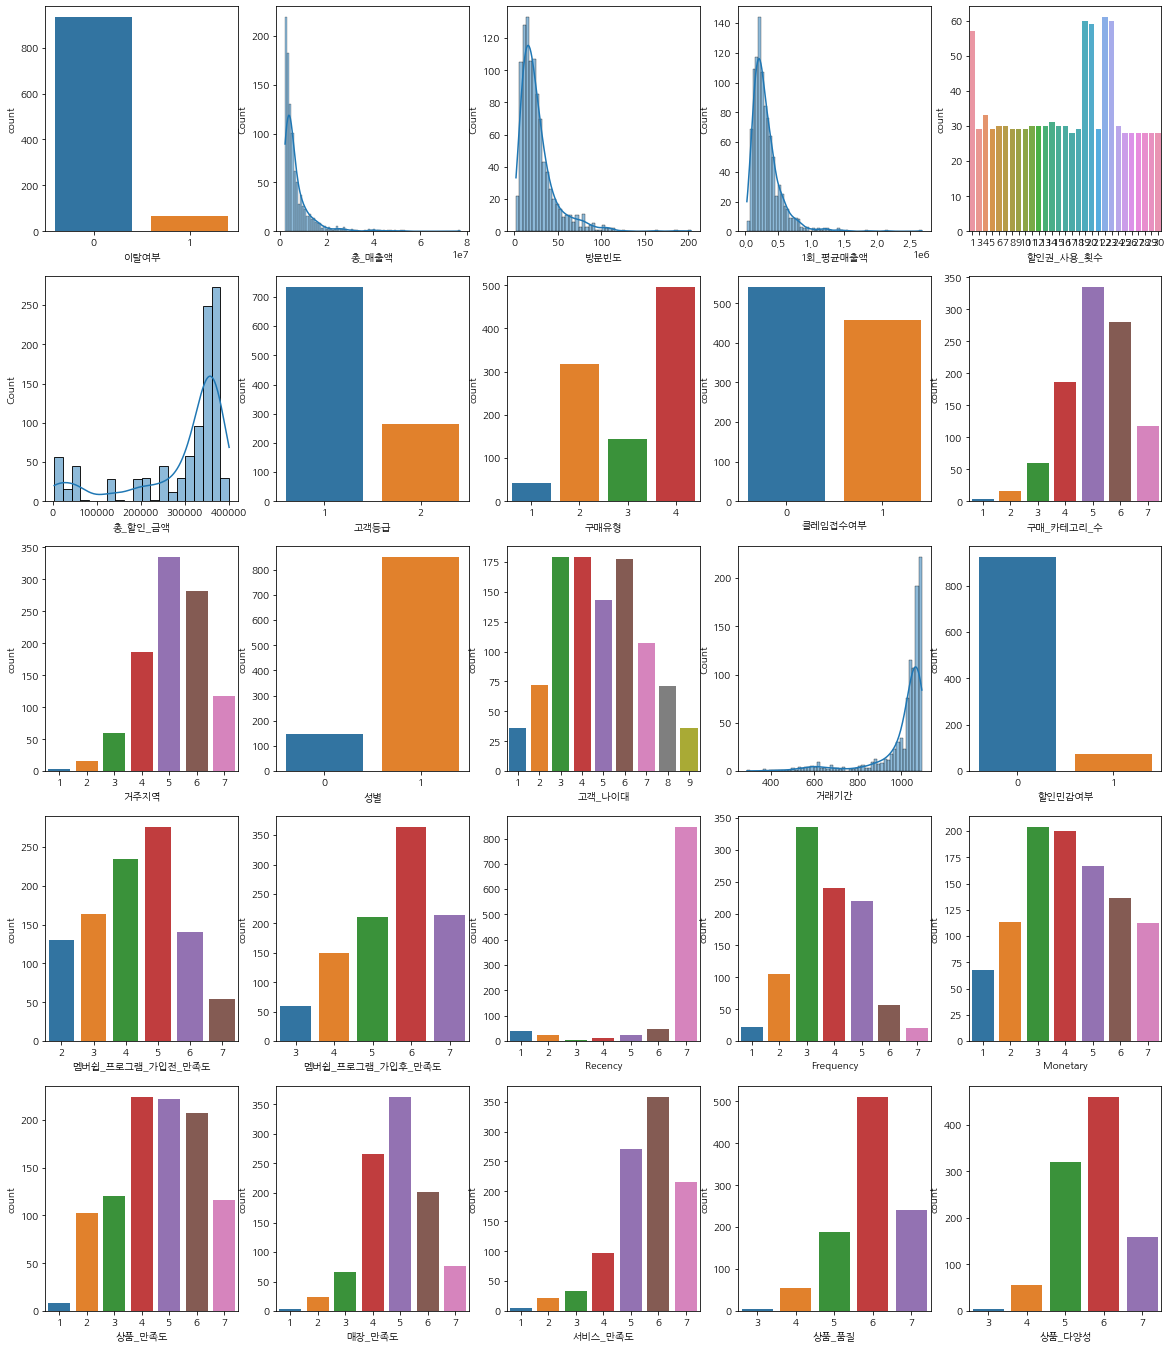

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

matplotlib.rcParams['font.family'] = "NaNumGothic"

fig, axs = plt.subplots(5,5)
fig.set_size_inches(20,24)

for i in range(5):
    for j in range(5):
        attr = i*5+j+1
        if df[df.columns[attr]].nunique() < 30:
            sns.countplot(x=df.columns[attr], data=df, ax=axs[i][j])
        else:
            sns.histplot(x=df.columns[attr], data=df,kde=True,
            ax=axs[i][j])

#데이터전처리

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용_횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [ ]:
#결측치 확인
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용_횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [ ]:
#결측치 있는 열 확인
df[['상품_진열_위치','상품_설명_표시']]

,상품_진열_위치,상품_설명_표시
0,7.0,6.0
1,6.0,NaN
2,7.0,NaN
3,5.0,6.0
4,5.0,6.0
...,...,...
995,6.0,6.0
996,6.0,6.0
997,6.0,NaN
998,5.0,5.0


In [ ]:
# 평균값으로 대체
df.loc[df['상품_진열_위치'] != df['상품_진열_위치'], '상품_진열_위치'] = df['상품_진열_위치'].mean()
df.loc[df['상품_설명_표시'] != df['상품_설명_표시'], '상품_설명_표시'] = df['상품_설명_표시'].mean()

# 평균값으로 대체한 열을 정수로 변환
df['상품_진열_위치'] = df['상품_진열_위치'].astype(int)
df['상품_설명_표시'] = df['상품_설명_표시'].astype(int)

df[['상품_진열_위치','상품_설명_표시']]

,상품_진열_위치,상품_설명_표시
0,7,6
1,6,5
2,7,5
3,5,6
4,5,6
...,...,...
995,6,6
996,6,6
997,6,5
998,5,5


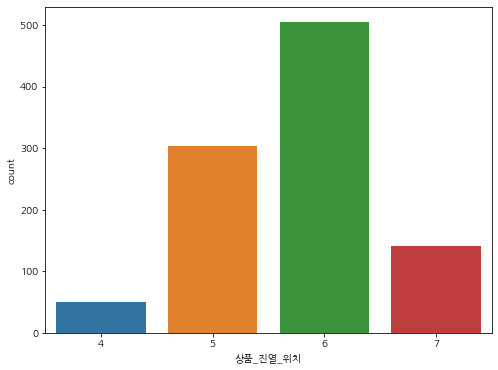

In [ ]:
#시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

matplotlib.rcParams['font.family'] = "NaNumGothic"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='상품_진열_위치', data=df)
plt.show()

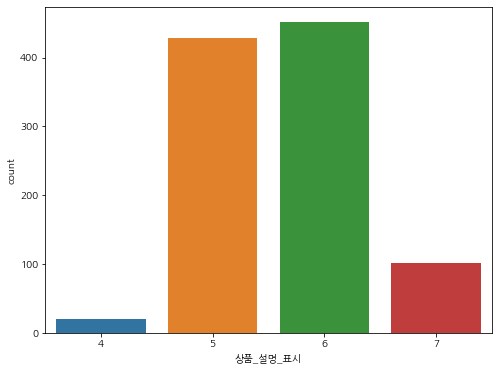

In [ ]:
matplotlib.rcParams['font.family'] = "NaNumGothic"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='상품_설명_표시', data=df)
plt.show()

In [ ]:
df.isnull().sum()

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용_횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
dtype: int64

In [ ]:
df[[ '구매_카테고리_수', '거주지역']]

,구매_카테고리_수,거주지역
0,6,6
1,4,4
2,6,6
3,5,5
4,6,6
...,...,...
995,6,6
996,6,6
997,4,4
998,5,5


BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f344fca0f40>, <matplotlib.lines.Line2D object at 0x7f344fc32220>], 'caps': [<matplotlib.lines.Line2D object at 0x7f344fc324c0>, <matplotlib.lines.Line2D object at 0x7f344fc32760>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f344fca0ca0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f344fc32a00>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f344fc32ca0>], 'means': []})

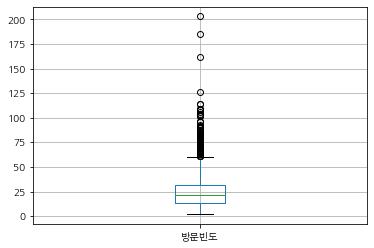

In [ ]:
# 방문빈도 이상치 확인 및 제거
df.boxplot(column = "방문빈도", return_type="both")

<Axes: >

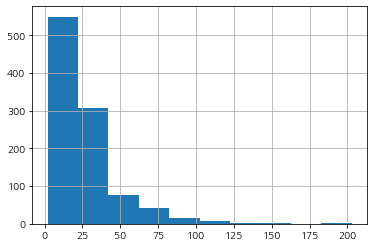

In [ ]:
df["방문빈도"].hist()

In [ ]:
q1 = df["방문빈도"].quantile(q=0.25)
q3 = df["방문빈도"].quantile(q=0.75)
IQR = q3-q1
IQR

19.0

<Axes: >

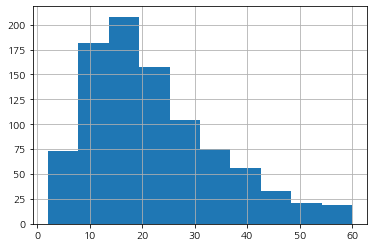

In [ ]:
data_IQR =df[(df["방문빈도"] < q3 + IQR * 1.5) & (df["방문빈도"] > q1 - IQR * 1.5)]
data_IQR["방문빈도"].hist()

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f344f5d77f0>, <matplotlib.lines.Line2D object at 0x7f344f5d7a90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f344f5d7d30>, <matplotlib.lines.Line2D object at 0x7f344f5d7fd0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f344f5d7550>], 'medians': [<matplotlib.lines.Line2D object at 0x7f344f56b2b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f344f56b550>], 'means': []})

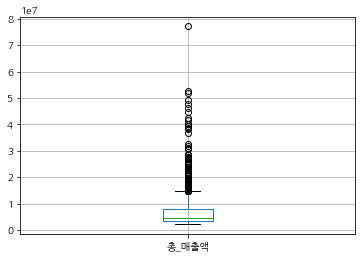

In [ ]:
#총매출액 이상치 확인 및 제거
df.boxplot(column = "총_매출액", return_type="both")

<Axes: >

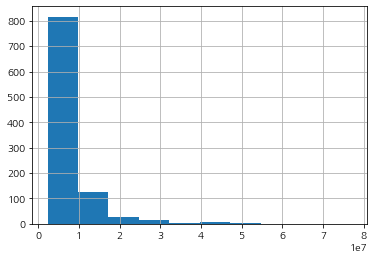

In [ ]:
df["총_매출액"].hist()

In [ ]:
q1 =df["총_매출액"].quantile(q=0.25)
q3 = df["총_매출액"].quantile(q=0.75)
IQR = q3-q1
IQR

4597005.0

<Axes: >

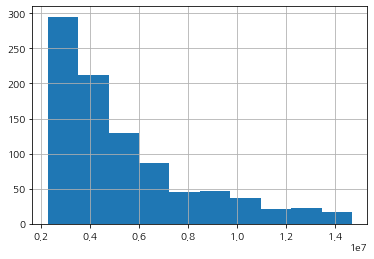

In [ ]:
data_IQR =df[(df["총_매출액"] < q3 + IQR * 1.5) & (df["총_매출액"] > q1 - IQR * 1.5)]
data_IQR
data_IQR["총_매출액"].hist()


#종속변수'구매유형' 0과 1로 바꾸기기

In [ ]:
for i in df.index:
  if df.loc[i,"구매유형"] == 4:
      df.loc[i,"구매유형"] = 1 
  else:
      df.loc[i,"구매유형"] = 0

In [ ]:
df["구매유형"]

0      1
1      1
2      1
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    1
Name: 구매유형, Length: 1000, dtype: int64

In [ ]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용_횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,1,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,1,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,1,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,1,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,0,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,0,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,0,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,1,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,0,0,...,5,4,4,4,4,4,5,5,4,4


#상관분석

In [ ]:
# 상관계수 분석1
df1 = df[['구매유형','이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용_횟수', '총_할인_금액', '고객등급',
       '클레임접수여부','성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary']]
df1.corr(method="pearson")

,구매유형,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용_횟수,총_할인_금액,고객등급,클레임접수여부,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary
구매유형,1.000000,-0.001856,-0.381247,-0.415969,-0.226166,-0.100131,-0.101220,0.099871,0.021417,-0.017389,-0.051637,-0.071680,-0.042990,0.007478,-0.001562,-0.020131,-0.377741,-0.426056
이탈여부,-0.001856,1.000000,-0.057261,-0.091453,0.140668,0.008247,0.003689,0.037818,-0.006044,-0.045120,0.010070,-0.845259,-0.046668,-0.039901,0.044554,-0.904486,-0.123964,-0.049799
총_매출액,-0.381247,-0.057261,1.000000,0.631171,0.314133,-0.010340,-0.004880,-0.168059,-0.041243,-0.044957,0.027746,0.150971,0.166410,0.047055,0.010579,0.095385,0.521874,0.709016
방문빈도,-0.415969,-0.091453,0.631171,1.000000,-0.279690,0.019787,0.044814,-0.248571,-0.080793,0.011183,0.010255,0.242049,0.033399,0.025527,0.026712,0.134239,0.868023,0.512729
1회_평균매출액,-0.226166,0.140668,0.314133,-0.279690,1.000000,-0.003491,-0.018000,0.143862,0.061389,-0.032951,0.017247,-0.182621,0.089242,0.023375,0.035367,-0.138025,-0.428386,0.331695
할인권_사용_횟수,-0.100131,0.008247,-0.010340,0.019787,-0.003491,1.000000,0.848666,-0.053254,0.013144,0.002029,0.010123,0.000448,0.013555,0.020503,0.040507,-0.001262,0.008009,-0.022548
총_할인_금액,-0.101220,0.003689,-0.004880,0.044814,-0.018000,0.848666,1.000000,-0.013872,0.023971,0.007609,0.062236,0.018527,0.016225,-0.002122,0.024852,0.007452,0.041388,-0.000259
고객등급,0.099871,0.037818,-0.168059,-0.248571,0.143862,-0.053254,-0.013872,1.000000,0.044989,-0.046815,-0.022145,-0.124318,0.134799,-0.019156,-0.000751,-0.069030,-0.321486,-0.222704
클레임접수여부,0.021417,-0.006044,-0.041243,-0.080793,0.061389,0.013144,0.023971,0.044989,1.000000,0.329066,0.009522,0.016319,0.008451,0.011776,-0.007831,0.016039,-0.073413,-0.046273
성별,-0.017389,-0.045120,-0.044957,0.011183,-0.032951,0.002029,0.007609,-0.046815,0.329066,1.000000,0.008229,0.105188,0.003434,0.010338,0.024450,0.093019,0.028666,-0.030962


In [ ]:
# 상관계수 분석2
df1 = df[['구매유형','상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성']]
df1.corr(method="pearson")

,구매유형,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
구매유형,1.000000,-0.106208,-0.070702,0.015379,0.004107,-0.028619,-0.002842,-0.021184,0.014613,0.000121,0.011676,-0.020937,0.008271,-0.013208,0.047731,-0.017721,-0.000786,-0.050750,-0.048649
상품_만족도,-0.106208,1.000000,0.448583,0.436395,-0.003248,0.023477,0.021646,0.084342,0.137679,0.062934,0.056916,0.023198,0.036606,0.106611,0.077330,0.011494,-0.025807,0.054790,0.040827
매장_만족도,-0.070702,0.448583,1.000000,0.482141,-0.089591,0.009446,0.010143,-0.002590,0.022921,-0.042511,-0.046502,-0.003665,-0.045544,0.005725,0.001062,0.000464,-0.084992,-0.064337,-0.094072
서비스_만족도,0.015379,0.436395,0.482141,1.000000,0.034595,0.057780,0.049180,0.044696,0.051892,0.031033,0.034104,-0.002982,0.019636,0.049168,0.092265,0.058026,0.018398,0.020362,0.060201
상품_품질,0.004107,-0.003248,-0.089591,0.034595,1.000000,0.427508,0.354267,0.346731,0.344450,0.395824,0.449419,0.355701,0.364443,0.319577,0.192339,0.136749,0.356280,0.434257,0.368424
상품_다양성,-0.028619,0.023477,0.009446,0.057780,0.427508,1.000000,0.461573,0.369922,0.266975,0.348386,0.391955,0.350165,0.240624,0.322796,0.220783,0.193807,0.363385,0.458860,0.419028
가격_적절성,-0.002842,0.021646,0.010143,0.049180,0.354267,0.461573,1.000000,0.460131,0.285473,0.321532,0.366310,0.351858,0.336328,0.223523,0.195470,0.158285,0.265067,0.358634,0.325290
상품_진열_위치,-0.021184,0.084342,-0.002590,0.044696,0.346731,0.369922,0.460131,1.000000,0.406735,0.265655,0.346379,0.338009,0.358144,0.309879,0.124515,0.151028,0.295149,0.343871,0.319850
상품_설명_표시,0.014613,0.137679,0.022921,0.051892,0.344450,0.266975,0.285473,0.406735,1.000000,0.256624,0.267200,0.179234,0.234002,0.226634,0.147151,0.122488,0.233393,0.257291,0.258613
매장_청결성,0.000121,0.062934,-0.042511,0.031033,0.395824,0.348386,0.321532,0.265655,0.256624,1.000000,0.395092,0.357064,0.305957,0.470125,0.198924,0.218593,0.223041,0.355502,0.309440


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '피어슨 상관계수'}>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


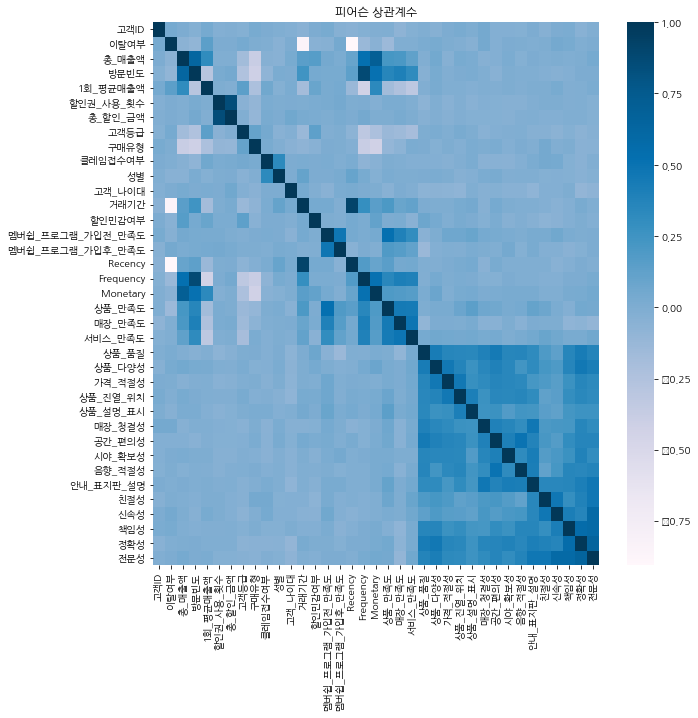

In [ ]:
#상관관계 분석 시각화
matplotlib.rcParams['font.family'] = "NaNumGothic"
colormap = plt.cm.PuBu
plt.figure(figsize=(10,10))
plt. title("피어슨 상관계수")
sns.heatmap(df.astype(float).corr(), cmap=colormap)

#로지스틱회귀분석

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용_횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = df[['총_매출액',
'할인권_사용_횟수',
'총_할인_금액',
'방문빈도',
'상품_만족도',
'매장_만족도',
'멤버쉽_프로그램_가입후_만족도',
'할인민감여부',
'상품_품질',
'가격_적절성',
'거주지역',
'고객_나이대',
'거래기간']]
Y = df['구매유형']

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)


#오버 샘플링
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
# X_train_over, Y_train_over = smote.fit_resample(X_train,Y_train)

X = df[['총_매출액',
'할인권_사용_횟수',
'총_할인_금액',
'방문빈도',
'상품_만족도',
'매장_만족도',
'멤버쉽_프로그램_가입후_만족도',
'할인민감여부',
'상품_품질',
'가격_적절성',
'거주지역',
'고객_나이대',
'거래기간']]
Y = df['구매유형']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0) #데이터를 트레인 값이랑 테스트 값(7:3)으로 나누는 작업

#Column transform
ct = ColumnTransformer([("scaling",StandardScaler(),['총_매출액','할인권_사용_횟수','총_할인_금액','방문빈도','거래기간']), 
                        ("onehot",OneHotEncoder(sparse=False),['상품_만족도','매장_만족도','멤버쉽_프로그램_가입후_만족도','할인민감여부','상품_품질','가격_적절성','거주지역','고객_나이대',])])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

#model
multilogit = LogisticRegression(random_state=0, solver='newton-cg',multi_class="multinomial")
#slover:"lbfgs", "liblinear","sag","saga"
multilogit.fit(X_train,Y_train)
Y_pred=multilogit.predict(X_test) 

#성능
print("r2:{:.3f}".format(multilogit.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))
print(multilogit.coef_)



r2:0.890
              precision    recall  f1-score   support

           1       0.67      0.25      0.36        16
           2       0.89      0.85      0.87        98
           3       0.93      0.78      0.85        36
           4       0.81      0.92      0.86       150

    accuracy                           0.84       300
   macro avg       0.82      0.70      0.74       300
weighted avg       0.84      0.84      0.84       300

[[-1.43318221e+00  1.15448468e-01  1.97255179e+00 -1.81811538e+00
   7.91819078e-02  2.26630230e-01 -2.33008246e-01 -3.28254503e-01
   5.23066933e-01  2.89653895e-01 -1.94981434e-01 -2.83107164e-01
   2.87541629e-01  8.54936327e-01  2.35826269e-01 -8.12129593e-01
  -2.17480290e-01 -3.42012713e-01 -6.68191886e-03  5.90660585e-01
   1.71241931e-01 -5.65073839e-01 -3.14104410e-01  1.17275444e-01
  -5.72450886e-01  5.72450597e-01 -6.62179270e-02  6.12610063e-01
  -5.83231017e-02 -2.30437311e-01 -2.57632013e-01 -2.58192304e-01
   2.06810734e-01  4.1995984

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#랜덤포레스트

In [ ]:
#1. 변수선택
X = df[['총_매출액',
'할인권_사용_횟수',
'총_할인_금액',
'방문빈도',
'상품_만족도',
'매장_만족도',
'멤버쉽_프로그램_가입후_만족도',
'할인민감여부',
'상품_품질',
'가격_적절성',
'거주지역',
'고객_나이대',
'거래기간']]
Y = df['구매유형']

#2. train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling",StandardScaler(),['총_매출액','할인권_사용_횟수','총_할인_금액','방문빈도','거래기간']), 
                        ("onehot",OneHotEncoder(sparse=False),['상품_만족도','매장_만족도','멤버쉽_프로그램_가입후_만족도','할인민감여부','상품_품질','가격_적절성','거주지역','고객_나이대'])])
ct.fit(X_train)
ct.transform(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
#fit 먼저 해서 인코딩이 되는지 확인하고 그것을 적용시켜주는게 transform이당나귀

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

#5. 모형 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, n_estimators=300,max_depth = 3)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("Y predict value:\n,",Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test,Y_test)))
print(classification_report(Y_test, Y_pred))

#과적합 우려 ; 랜덤포레스트는 과적합이 잘 나옴

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Y predict value:
, [0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1
 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0
 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1
 0 1 0 0]
accuracy(test) : 0.793
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       150
           1       0.75      0.89      0.81       150

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



#회귀계수 분석

In [ ]:
df2 = pd.concat([X,Y], axis = 1)

In [ ]:
b = pd.DataFrame(multilogit.coef_).T
b.sort_values(0)

,0
13,-1.056789
0,-0.884300
3,-0.809089
35,-0.655935
12,-0.519851
50,-0.412274
36,-0.218438
6,-0.173688
37,-0.153388
45,-0.146710


#종속변수 20대 로지스틱회귀분석

In [ ]:
#종속변수0과 1로 바꾸기

for i in df.index:
  if df.loc[i,"고객_나이대"] == 2:
      df.loc[i,"고객_나이대"] = 1 
  else:
      df.loc[i,"고객_나이대"] = 0


In [ ]:
df["고객_나이대"]

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: 고객_나이대, Length: 1000, dtype: int64

In [ ]:
df["구매유형"]

0      4
1      4
2      4
3      4
4      2
      ..
995    3
996    2
997    4
998    3
999    4
Name: 구매유형, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = df[['총_매출액',
'할인권_사용_횟수',
'총_할인_금액',
'방문빈도',
'상품_만족도',
'매장_만족도',
'멤버쉽_프로그램_가입후_만족도',
'할인민감여부',
'상품_품질',
'가격_적절성',
'거주지역',
'고객_나이대',
'거래기간']]
Y = df['구매유형']

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)


#오버 샘플링
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
# X_train_over, Y_train_over = smote.fit_resample(X_train,Y_train)

X = df[['총_매출액',
'할인권_사용_횟수',
'총_할인_금액',
'방문빈도',
'상품_만족도',
'매장_만족도',
'멤버쉽_프로그램_가입후_만족도',
'할인민감여부',
'상품_품질',
'가격_적절성',
'거주지역',
'거래기간',
'구매유형']]
Y = df['고객_나이대']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0) #데이터를 트레인 값이랑 테스트 값(7:3)으로 나누는 작업

#Column transform
ct = ColumnTransformer([("scaling",StandardScaler(),['총_매출액','할인권_사용_횟수','총_할인_금액','방문빈도','거래기간']), 
                        ("onehot",OneHotEncoder(sparse=False),['상품_만족도','매장_만족도','멤버쉽_프로그램_가입후_만족도','할인민감여부','상품_품질','가격_적절성','거주지역','구매유형'])])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

#model
multilogit = LogisticRegression(random_state=0, solver='newton-cg',multi_class="multinomial")
#slover:"lbfgs", "liblinear","sag","saga"
multilogit.fit(X_train,Y_train)
Y_pred=multilogit.predict(X_test) 

#성능
print("r2:{:.3f}".format(multilogit.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))
print(multilogit.coef_)



r2:0.934
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       275
           1       1.00      0.04      0.08        25

    accuracy                           0.92       300
   macro avg       0.96      0.52      0.52       300
weighted avg       0.93      0.92      0.88       300

[[-0.13716342  0.37706094 -0.50230366  0.15594654 -0.01852283 -0.16704684
   0.19664847  0.17434343 -0.19868921  0.03090222 -0.0939404   0.05776426
  -0.04660535  0.50057036  0.01378068  0.05477074 -0.12101748 -0.23093292
  -0.17058408 -0.08958526  0.27058551 -0.09124695  0.128545   -0.21831636
  -0.08308518  0.08306712 -0.12895776  0.25300555  0.05799828 -0.0646885
  -0.11737563  0.13431863 -0.12172308 -0.0655578   0.05294418 -0.05568116
  -0.23103422  0.04619171  0.25214739 -0.18267975 -0.03184805  0.20288602
  -0.06109806  0.14506482 -0.40387138  0.31988657]]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df3 = pd.concat([X,Y], axis = 1)

In [ ]:
c = pd.DataFrame(multilogit.coef_).T
c.sort_values(0)

,0
2,-0.502304
44,-0.403871
36,-0.231034
17,-0.230933
23,-0.218316
8,-0.198689
39,-0.182680
18,-0.170584
5,-0.167047
0,-0.137163
